# Lab | Customer Analysis Round 3

## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
marketing_customer_df = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
marketing_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
marketing_customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
#Analysis of total number of responses.
response_mapping = {"Yes":1, "No":0}
marketing_customer_df['Response Count'] = marketing_customer_df['Response'].map(response_mapping)
marketing_customer_df['Response Count']
response_rate = marketing_customer_df[(marketing_customer_df['Response']=="Yes")].count()/marketing_customer_df['Response Count'].count()
response_rate

Customer                         0.143201
State                            0.143201
Customer Lifetime Value          0.143201
Response                         0.143201
Coverage                         0.143201
Education                        0.143201
Effective To Date                0.143201
EmploymentStatus                 0.143201
Gender                           0.143201
Income                           0.143201
Location Code                    0.143201
Marital Status                   0.143201
Monthly Premium Auto             0.143201
Months Since Last Claim          0.143201
Months Since Policy Inception    0.143201
Number of Open Complaints        0.143201
Number of Policies               0.143201
Policy Type                      0.143201
Policy                           0.143201
Renew Offer Type                 0.143201
Sales Channel                    0.143201
Total Claim Amount               0.143201
Vehicle Class                    0.143201
Vehicle Size                     0

<function matplotlib.pyplot.show(close=None, block=None)>

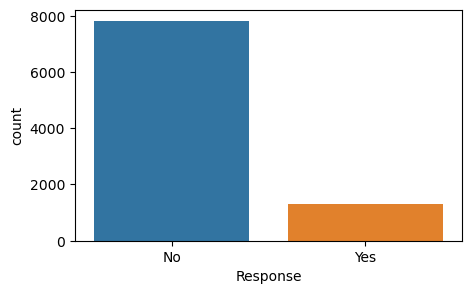

In [72]:
# Show a plot of the total number of responses.
fig = plt.subplots(figsize=(5,3))
sns.countplot(data=marketing_customer_df, x='Response')
plt.show

In [6]:
# Response rate by sales channel
groupby = marketing_customer_df.groupby(['Sales Channel', 'Response'])[['Response']].agg('count')
#marketing_customer_df.pivot_table(index='Sales Channel', columns='Response', aggfunc={'Response':'count'})
groupby.columns= ['Response Count']
groupby

Response Count
Sales Channel Response                
Agent         No                  2811
              Yes                  666
Branch        No                  2273
              Yes                  294
Call Center   No                  1573
              Yes                  192
Web           No                  1169
              Yes                  156

<function matplotlib.pyplot.show(close=None, block=None)>

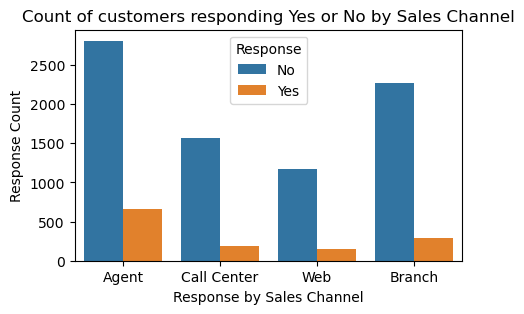

In [97]:
# Show a plot of the response rate by the sales channel.
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data=marketing_customer_df, x='Sales Channel', hue='Response', ax=ax)
ax.set_xlabel("Response by Sales Channel")
ax.set_ylabel("Response Count")
ax.set_title("Count of customers responding Yes or No by Sales Channel")
plt.show

#### I was practicing a bit. We actually want to see the response RATE. So I defined a function that calculates the rate by Column Elements.

In [89]:
def response_rate_per_categ (df: pd.DataFrame, col= 'Sales Channel') -> pd.DataFrame:
    '''
    Calculating the response rate of customers responding Yes of the unique "elements" within a Column.
    Input: Data Frame
           Col for Column Name
    '''
    # make a safety copy
    df2= df.copy()
    
    # Group By Sales Channel and Response (Yes / No) and count Responses per Yes/No
    groupby = df2.groupby([col, 'Response'])[['Response']].agg('count')
    
    #Rename columns
    groupby.columns = ['Response Count']
    
    # Reset Index
    groupby = groupby.reset_index()
    
    #Filter for every element in the column and create new df
    list_of_elements = list(groupby[col].unique())
    rates = {}
    for i in range(len(list_of_elements)):
        df3 = groupby[groupby[col] == list_of_elements[i]]
        #print(df3)
        # create response rate for
        response_rate = df3[(df3['Response']=="Yes")]['Response Count'].sum()/df3['Response Count'].sum()
        #add it as a new column to df3
        rates[list_of_elements[i]] = response_rate
    
    final_df = groupby[groupby['Response']=='Yes'].copy()
    final_df.loc[:,'response_rate'] = final_df[col].map(rates)
    return final_df
    

In [99]:
channel_responses = response_rate_per_categ(marketing_customer_df)
channel_responses

,Sales Channel,Response,Response Count,response_rate
1,Agent,Yes,666,0.191544
3,Branch,Yes,294,0.114531
5,Call Center,Yes,192,0.108782
7,Web,Yes,156,0.117736


<function matplotlib.pyplot.show(close=None, block=None)>

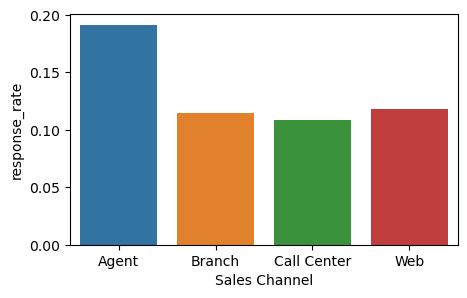

In [96]:
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(data=channel_responses, x='Sales Channel', y='response_rate', ax=ax)
plt.show

- the response rate is bad in in all sales channels
- the best response rate is however coming from Agent Channel

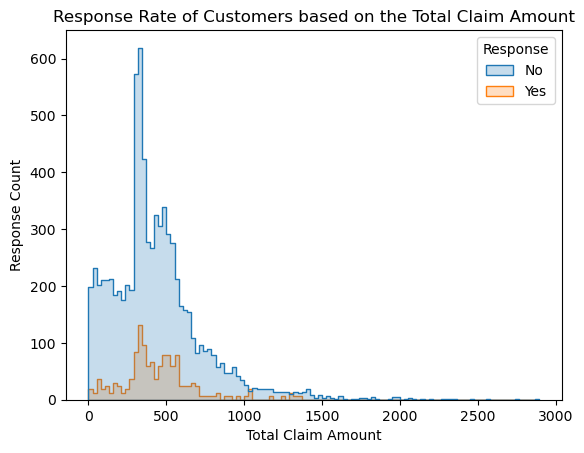

In [46]:
#Show a plot of the response rate by the total claim amount.fig, ax = plt.subplots()
sns.histplot(data=marketing_customer_df, x='Total Claim Amount', hue='Response', element='step')
ax.set_ylabel("Response Count")
ax.set_title("Response Rate of Customers based on the Total Claim Amount")
plt.show()

- The graph is difficult to analysis. The Response rate is bad (in terms of count) in all Claim Amount Bins.
- Around a claim amount 1000, there are slightly more responses than no responses.

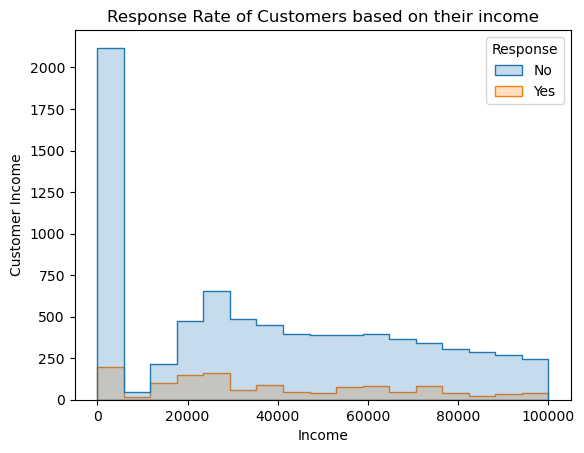

In [47]:
#Show a plot of the response rate by income.
fig, ax = plt.subplots()
sns.histplot(data=marketing_customer_df, x='Income', hue='Response', element='step')
ax.set_ylabel("Response Count")
ax.set_ylabel("Customer Income")
ax.set_title("Response Rate of Customers based on their income")
plt.show()

- Lower Income Customers have a very low response rate.